## 랜덤포레스트

연세대학교 응용통계학과 김아현, 명지애, 김현중님의  Random forest ensemble using a a weight-adjusted voting algorithm 논문 중에서 랜덤포레스트에 대한 개념을 이해하고 분석하기!!

## 랜덤 포레스트의 개요

-> 분류 앙상블은 더 정확한 클래스 예측을 얻기 위해 서로 다른 분류기를 결합하는 학습 방법이다.
개발된 많은 방법 중 랜덤 포레스트는 가장 정확한 앙상블 방법 중 하나로 알려져 있다. 

-> 단순 다수결 방식을 사용한 무작위 결정 트리를 결합한다.

-> 실험에 따르면 앙상블 크기가 클수록 단일트리, 배깅, 에이다부스트. 랜덤포레스트(단순 다수결 투표)를 포함한 다른 방법보다 더 정확하다는 것을 알 수 있었다.

## 1. Introduction

-> 분류란 데이터 인스턴스를 여러 카테고리 중에서 하나로 할당하는 것이다. 분류 앙상블은 최종 분류를 얻기 위해 다른 분류기와 결합하는 학습 방법이다.

-> 이전 연구에 따르면 단일 분류기 보다는 앙상블 분류가 일반적으로 더 높은 수준의 정확도를 보여주었고, 지금까지 앙상블을 생성하는 많은 알고리즘이 많이 개발되었는데 이 중 배깅, 부스팅 및 랜덤 포레스트가 이 분야를 주도한 핵심 방법이다.

-> 배깅은 훈련 데이터에서 여러 부트 스트랩 세트를 생성하고 각각을 사용하여 앙상블에 포함 할 분류기를 생성한다.
-> Random Forest는 Feature Selection을 통해 의사결정트리의 무작위성을 높여 다양성을 향상시키는 배깅방법의 진화 버전이다.

-> 트리의 각 노드에서 모든 입력변수가 아니라 무작위로 선택된 변수 세트가 분할 변수의 후보이다. 랜덤포레스트의 개념은 직관에 반하는 것처럼 보이지만 다른 분류 방법에 비해 잘 수행된다.

-> 분류 앙상블의 문제 중 하나는 각 분류기가 집계되는 방식이다. 일반적으로 분류기를 결합하는 두 가지 방법이 있는데, 단순 과반수 투표방식과 가중투표방식이다.

-> 단순 과반수 투표는 가장 많은 표를 얻은 클래스를 기반으로 최종 클래스를 결정하는 규칙이다. 이것은 배깅 및 랜덤 포레스트를 포함하여 가장 일반적으로 사용되는 방식이다. = Hard Voting

-> 그러나 가중 투표는 각 분류 자에 대한 신뢰도를 반영하는 가중치를 고려하고 배깅시스템에서 단순 과반수에 비해 성능이 크게 향상된 것이 확인되었다.

## 2. 배깅과 랜덤포레스트

* 2.1 배깅
-> 배깅 예측기는 훈련 데이터 세트의 부트 스트랩 샘플을 기반으로 하는 의사결정 트리를 사용하여 단순 다수결 투표를 통해 최종 클래스 레이블을 예측한다.

*  2.2. 랜덤 포레스트
-> 배깅의 핵심 아이디어는 분산은 높지만 바이어스 특성이 낮은 분류기의 결과를 평균하여 분산을 줄이는 것이다. 
-> 의사 결정 트리는 배깅에서 분산 감소 효과를 활용하기에 매우 적합한 후보이지만 각 트리는 부트 스트랩 된 데이터에서 생성되기 때문에 트리의 결과간에 양의 상관 관계가 있을 수 있다. 따라서 배깅에서 평균의 분산은 상관 관계로 인해 일부 임계 값보다 낮을 수 없다. 
-> 랜덤 포레스트는 트리의 상관 관계를 해제하여 배깅의 분산 감소를 개선한다. 부트 스트랩 리샘플링을 사용하여 많은 수의 트리를 생성하고 배깅에서와 같이 간단한 과반수 투표로 집계한다. 
->그러나 각 노드에서 기능 세트를 무작위로 선택하고 그 중에서 가장 좋은 것을 찾아 트리에 무작
위성을 주입한다. Random Forest는 분류 문제에서 가장 성공적인 예측 알고리즘 중 하나로 인식되었다.
-> 모든 피쳐 대신 임의의 피쳐 하위 집합을 사용하기 때문에 배깅보다 속도가 빠르다.
-> 랜덤 포레스트는 튜닝이 거의 필요하지 않고 정확하고 빠르다는 이유로 매우 가치가 있다. 그러나 분류기가 결합되는 방법을 수정하여 알고리즘을 개선할 수 있다. 랜덤 포레스트는 앙상블에 있는 트리 중 일부 불량한 트리를 포함 할 수 있으며, 특히 입력 변수가 대부분 잡음이 있는경우 그 비율이 중요하다. 그러나 랜덤 포레스트의 모든 나무는 최종 결과에 대한 투표에서 똑같이 중요하게 취급되므로 정확성이 떨어질 수 있다.

## 3. Random Forest 기본 실습코드

## 3.1 Voting classifier

* 위스콘신 유방암 데이터

In [1]:
# 사용할 라이브러리 불러오기 및 데이터 셋 불러오기
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()

df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df.head()

mean radius  mean texture  ...  worst symmetry  worst fractal dimension
0        17.99         10.38  ...          0.4601                  0.11890
1        20.57         17.77  ...          0.2750                  0.08902
2        19.69         21.25  ...          0.3613                  0.08758
3        11.42         20.38  ...          0.6638                  0.17300
4        20.29         14.34  ...          0.2364                  0.07678

[5 rows x 30 columns]

In [2]:
# 데이터 셋 확인
print(df.info())
print(df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

VotingClassifier로 개별모델은 로지스틱 회귀와 KNN을 보팅방식으로 결합하고 성능 비교

In [3]:
# 개별 모델은 로지스틱 회귀와 KNN
lr_clf = LogisticRegression()
knn_clf = KNeighborsClassifier()

# 개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기
vo_clf = VotingClassifier(estimators=[('LR',lr_clf),('KNN',knn_clf)], voting='soft') # estimators = 각각의 분류기를 튜플 형태로 만들어 리스트 형태로 입력

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    test_size=0.2, random_state= 156)

In [4]:
# VotingClassifier 학습/예측/평가

vo_clf.fit(X_train, y_train)
pred = vo_clf.predict(X_test)
print('Voting 분류기 예측 정확도 : {0:.4f}'.format(accuracy_score(y_test, pred)))

# 개별 모델의 학습/예측/평가
classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
  classifier.fit(X_train, y_train)
  pred = classifier.predict(X_test)
  class_name = classifier.__class__.__name__
  print('{0} 정확도: {1:.4f}'.format(class_name, accuracy_score(y_test , pred)))

Voting 분류기 예측 정확도 : 0.9474
LogisticRegression 정확도: 0.9386
KNeighborsClassifier 정확도: 0.9035


## 3.2 Random Forest

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(), columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) 
                                                                                           if x[1] >0 else x[0] ,  axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

In [7]:
def get_human_dataset( ):
    
    # 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당.
    feature_name_df = pd.read_csv('/content/drive/MyDrive/PerfectGuide_ML/dataset/UCI HAR Dataset/UCI HAR Dataset/features.txt',sep='\s+',
                        header=None,names=['column_index','column_name'])
    
    # 중복된 feature명을 새롭게 수정하는 get_new_feature_name_df()를 이용하여 새로운 feature명 DataFrame생성. 
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    
    # DataFrame에 피처명을 컬럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
    
    # 학습 피처 데이터 셋과 테스트 피처 데이터을 DataFrame으로 로딩. 컬럼명은 feature_name 적용
    X_train = pd.read_csv('/content/drive/MyDrive/PerfectGuide_ML/dataset/UCI HAR Dataset/UCI HAR Dataset/train/X_train.txt',sep='\s+', names=feature_name )
    X_test = pd.read_csv('/content/drive/MyDrive/PerfectGuide_ML/dataset/UCI HAR Dataset/UCI HAR Dataset/test/X_test.txt',sep='\s+', names=feature_name)
    
    # 학습 레이블과 테스트 레이블 데이터을 DataFrame으로 로딩하고 컬럼명은 action으로 부여
    y_train = pd.read_csv('/content/drive/MyDrive/PerfectGuide_ML/dataset/UCI HAR Dataset/UCI HAR Dataset/train/y_train.txt',sep='\s+',header=None,names=['action'])
    y_test = pd.read_csv('/content/drive/MyDrive/PerfectGuide_ML/dataset/UCI HAR Dataset/UCI HAR Dataset/test/y_test.txt',sep='\s+',header=None,names=['action'])
    
    # 로드된 학습/테스트용 DataFrame을 모두 반환 
    return X_train, X_test, y_train, y_test


X_train, X_test, y_train, y_test = get_human_dataset()

In [8]:
# 학습/테스트 데이터로 분리하고 랜덤 포레스트로 학습/예측/평가

from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = get_human_dataset()

# 랜덤 포레스트 학습 및 별도의 테스트 셋으로 예측 성능 평가
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도', round(accuracy,2))

랜덤 포레스트 정확도 0.93


GridSearchCV로 교차검증 및 하이퍼 파라미터 튜닝

In [9]:
from sklearn.model_selection import GridSearchCV

params = {'n_estimators': [100],
          'max_depth': [6, 8, 10, 12],
          'min_samples_leaf': [8, 12, 18],
          'min_samples_split': [8, 16, 20],}

# RandomForestClassifier 객체 생성후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
최고 예측 정확도: 0.9180


튜닝된 하이퍼 파라미터로 재 학습 및 예측/평가

In [10]:
rf_clf1 = RandomForestClassifier(n_estimators = 300, max_depth = 10, min_samples_leaf = 8,
                                 min_samples_split=8, random_state=0)
rf_clf1.fit(X_train, y_train)
pred = rf_clf1.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test , pred)))

예측 정확도: 0.9165


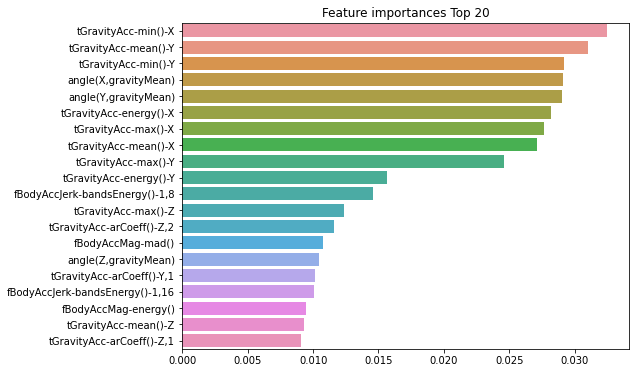

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

# Feature importances top 20 시각화
plt.figure(figsize=(8,6))
plt.title("Feature importances Top 20")
sns.barplot(x=ftr_top20, y = ftr_top20.index)
plt.show()